# Finding the Best Two Markets to Advertise In

<p style="text-align:center;">
  <img src="e-learning.jpg" width="700" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


## Introduction

This data analysis project aims to determine the optimal advertising strategy for an e-learning company specializing in programming courses. The company's course offerings span various domains, including web and mobile development, data science, game development, and more. In this project, we aim to identify the two most promising markets to invest advertising funds in, with the ultimate goal of promoting the company's products effectively. By leveraging relevant data sources and analytical tools, we aim to provide actionable insights to inform the company's advertising decision-making process.

## Understanding the Data

In order to determine the most effective markets for advertising our programming courses, conducting surveys in different markets is one option. However, this approach can be expensive, so we should explore more economical options first.

One alternative is to search for relevant data that already exists. One promising source is [the 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). conducted by [freeCodeCamp](https://www.freecodecamp.org/), a free e-learning platform specializing in web development courses. This survey, which received responses from more than 20,000 people, was published on the popular [Medium publication of freeCodeCamp](https://medium.freecodecamp.org/), which has over 400,000 followers. The survey attracted not only those interested in web development, but also new coders with diverse interests, making it a valuable resource for our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

To ensure that we are equipped with the necessary tools to analyze the data, we will begin by importing the required libraries.

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to avoid display of truncated columns
pd.options.display.max_columns=150

We will now quickly explore the `2017-fCC-New-Coders-Survey-Data.csv` file, which is stored in the `clean-data` folder of the repository mentioned earlier. Alternatively, we can use the direct link provided [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv) to read in the file.

In [2]:
# Read the survey data into dataframe and view first five rows
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

# Display number of rows and columns in dataset
print(f'Total Rows in survey data: {fcc_survey.shape[0]}')
print(f'Total Columns in survey data: {fcc_survey.shape[1]}')

Total Rows in survey data: 18175
Total Columns in survey data: 136


In [3]:
# Find the percentage of null values in each column
round(fcc_survey.isnull().sum()*100 / len(fcc_survey), 0)

Age                    15.0
AttendedBootcamp        3.0
BootcampFinish         94.0
BootcampLoanYesNo      94.0
BootcampName           95.0
                       ... 
YouTubeMIT             82.0
YouTubeMozillaHacks    97.0
YouTubeOther           93.0
YouTubeSimplilearn     99.0
YouTubeTheNewBoston    84.0
Length: 136, dtype: float64

There appear to be numerous columns with a significant proportion of null values. The plot below provides a summary of the number of non-null values present in each column of the dataset.

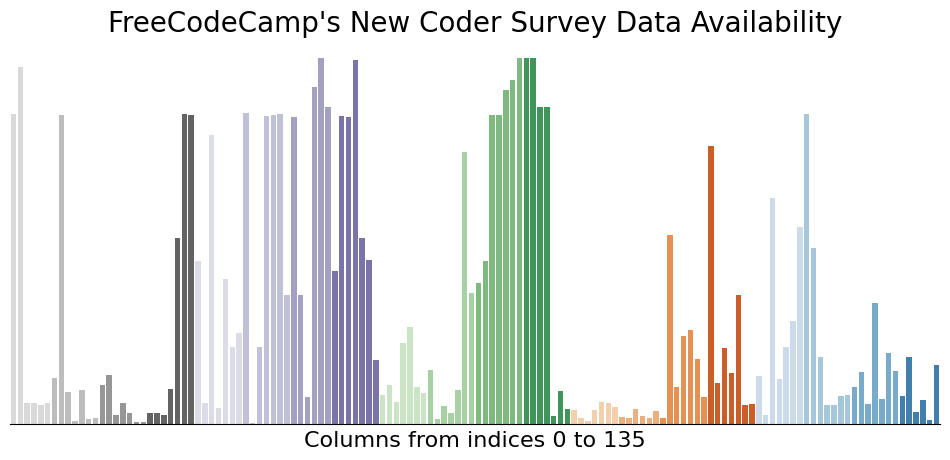

In [4]:
# Calculate non-null values of each column
cols_notnull_vals = fcc_survey.notnull().sum()

# PLot the non-null porportion of each column
plt.figure(figsize=(12,5))
sns.barplot(x=fcc_survey.columns, y=cols_notnull_vals, palette='tab20c_r')
plt.title("FreeCodeCamp's New Coder Survey Data Availability", size=20)
plt.xlabel('Columns from indices 0 to 135', size=16)
plt.tick_params(left=False,  bottom=False, labelleft=False, labelbottom=False)
sns.despine(top=True, right=True, left=True)
plt.show()

The dataset we are working with has a large number of empty or null values. To identify which fields are relevant for analysis and which can be disregarded, it's important to have additional knowledge about the contents of each column. While most column names are self-explanatory, there isn't a clear documentation available that explains the meaning of each column name.

In [5]:
# Display the first five rows of the dataset
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

To gain a better understanding of each column, we can consult the [datapackage.json](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/datapackage.json) file in the `clean-data` folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey) mentioned earlier. The initial survey questions are available there, which can provide insight into the description of each column. With this information, we can determine which fields are relevant for our analysis and disregard those that are not.

In [6]:
# Display the names of all columns present in the dataset
print(fcc_survey.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

Out of the 136 columns present in the dataset, the relevant ones for our analysis are those that can provide information about the coder's subject interests, willingness to invest in education and the extent of budget, current geographic location, and preferred language for communication and/or related information. Although some fields may not be required for the project's objective at this point, they might be useful for additional data analysis and are thus included.

Here are some of the relevant columns with their respective actual field names being less formatted:

- Age
- Country of Citizenship
- Country of Residence
- Field of Employment
- Employment Status
- Hours of Learning
- Job Role Interest
- Language Spoken at Home
- Budget for Learning
- Months of Programming Experience

Considering these relevant columns and their potential future use, we will keep only those that are necessary for our analysis and discard the rest:

In [7]:
# Filter dataset with relevant columns
rel_fcc_survey = fcc_survey[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
                             'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
                             'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
                             'HasStudentDebt', 'HoursLearning', 'Income', 'JobRoleInterest',
                             'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
                             'SchoolDegree', 'SchoolMajor']].copy()

Next, we will examine whether the remaining columns still have a significant number of missing values:

In [8]:
round(rel_fcc_survey.isnull().sum()*100 / len(rel_fcc_survey), 0)

Age                       15.0
AttendedBootcamp           3.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentStatus          21.0
Gender                    15.0
HasChildren               79.0
HasDebt                   16.0
HasFinancialDependents    16.0
HasHomeMortgage           65.0
HasStudentDebt            65.0
HoursLearning              8.0
Income                    58.0
JobRoleInterest           62.0
MaritalStatus             16.0
MoneyForLearning           9.0
MonthsProgramming          6.0
SchoolDegree              15.0
SchoolMajor               52.0
dtype: float64

Several columns including `EmploymentField`, `HasChildren`, `HasHomeMortgage`, `HasStudentDebt`, `Income`, and `JobRoleInterest`, have a high percentage of missing values, up to 79%. It's possible that many respondents considered these questions irrelevant, or in the case of `JobRoleInterest`, they may not have any specific plans for their future job role yet. On the other hand, the `MoneyForLearning` column has a relatively small number of missing values, and therefore we will use it as the primary column for financial information instead of `Income`.

## Checking for Sample Representativity

As we mentioned earlier, the courses we offer cover a range of domains, including web and mobile development, data science, and game development. However, for the purpose of our analysis, we are interested in a specific population: new coders who are interested in the subjects we teach. We want to answer questions about this population, such as their location and their willingness to invest in learning. Specifically, we would like to know:

- The geographic distribution of new coders interested in our courses.
- The locations with the highest concentration of new coders interested in our courses.
- The amount of money new coders are willing to spend on learning.

Before we can begin analyzing our sample data, we must first determine whether it is representative of our population of interest and includes the appropriate categories of people for our purposes.

In order to determine if our sample data is representative of our population of interest, we will examine the `JobRoleInterest` column. This column lists the job roles that each participant is interested in pursuing. By examining the values in this column, we can gain a better understanding of the interests of our population.

In [9]:
# Display the job roles of 50 participants who responded
for i in range(50):
    if pd.notnull(rel_fcc_survey.loc[i, 'JobRoleInterest']):
        print(rel_fcc_survey.loc[i, 'JobRoleInterest'])

Full-Stack Web Developer
  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer
  Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer
Full-Stack Web Developer, Information Security,   Mobile Developer,   Front-End Web Developer, Back-End Web Developer
Full-Stack Web Developer
Full-Stack Web Developer,   Quality Assurance Engineer, Game Developer, Back-End Web Developer,   User Experience Designer,   Front-End Web Developer
  DevOps / SysAdmin,   Data Scientist, Information Security, Data Engineer
Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer
Full-Stack Web Developer
Full-Stack Web Developer
Full-Stack Web Developer
Full-Stack Web Developer,   Front-End Web Developer,   User Experience Designer, Back-End Web Developer
  Front-End Web Developer,   Mobile Developer, Game Developer, Full-Stack Web Developer
Information Security
Full-Stack Web Developer
Back-End Web Developer
Fu

### Improve readability of the `JobRoleInterest` column

The transformation for role values is necessary to avoid marking the same subjects as different. For instance, "Full-Stack Developer" and "Full stack developer" will be updated to "full stack developer." This transformation is conditional and straightforward. However, there are certain scenarios where thorough data clean-up is required, but due to the lack of data for this column, these scenarios have not been considered for transformation. For example, there may be answers such as:

- "All whatever is required to develop tools to revolutionize the mechanical engineering process"
- "I don't know what the difference is between most of these soz lol"
- "I'm just learning code to increase my skill set. I see it as a literacy issue."

In addition to these scenarios, there may be cases where certain job roles are represented differently, such as "system engineer" and "systems engineer," or "front-end web developer" and "front end web developer." However, for the purposes of this analysis, only the basic and conditional transformation has been applied to ensure consistency in the job role values.

In [10]:
print(f'Total number of learners who responded for their job role interests: {rel_fcc_survey.JobRoleInterest.notnull().sum()}')
print(f'Total number of learners who responded for their job role interests (%): {round(rel_fcc_survey.JobRoleInterest.notnull().sum()/len(rel_fcc_survey)*100)}')

Total number of learners who responded for their job role interests: 6992
Total number of learners who responded for their job role interests (%): 38


The `JobRoleInterest` column in the `rel_fcc_survey` dataframe has a total of `6992` responses, but the data is inconsistent and messy. Each row can have multiple job role interests separated by commas, and some values may have additional characters or capitalization that differentiate the same subject. To clean up this column and make the data more consistent, we will use the Pandas string accessor to convert all values to lowercase and remove any additional characters that differentiate the same subjects. The resulting column will have a list of job role interests for each row, making it easier to analyze and compare the data.

In [11]:
rel_fcc_survey['JobRoleInterest'] = (rel_fcc_survey.JobRoleInterest
                                                   .str.replace(r'  |-', ' ', regex=True) # replace double whitespaces and hypens with single whitespace
                                                   .str.replace(r',\s+', ',', regex=True) # replace double whitespaces after ',' with single whitespace
                                                   .str.strip()
                                                   .str.lower()
                                                   .str.split(','))

In [12]:
# Display the job roles after the transformation (only non-null rows)
for i in range(50):
    if isinstance(rel_fcc_survey.loc[i, 'JobRoleInterest'], list) and len(rel_fcc_survey.loc[i, 'JobRoleInterest']) > 0:
        print(rel_fcc_survey.loc[i, 'JobRoleInterest'])

['full stack web developer']
['front end web developer', 'back end web developer', 'devops / sysadmin', 'mobile developer', 'full stack web developer']
['front end web developer', 'full stack web developer', 'back end web developer']
['full stack web developer', 'information security', 'mobile developer', 'front end web developer', 'back end web developer']
['full stack web developer']
['full stack web developer', 'quality assurance engineer', 'game developer', 'back end web developer', 'user experience designer', 'front end web developer']
['devops / sysadmin', 'data scientist', 'information security', 'data engineer']
['back end web developer', 'full stack web developer', 'front end web developer']
['full stack web developer']
['full stack web developer']
['full stack web developer']
['full stack web developer', 'front end web developer', 'user experience designer', 'back end web developer']
['front end web developer', 'mobile developer', 'game developer', 'full stack web developer']

The following code prepares plots to visualize the number of courses learners have shown interests in and provides a general idea of the most preferred roles.

In [13]:
# Count number of subjects/roles the learners has showns interest
roles_count = (
    rel_fcc_survey.JobRoleInterest.apply(lambda x: len(x)
                                         if x is not np.nan else np.nan).value_counts(normalize=True).mul(100).round(2)
)

roles_count

1.0     31.65
3.0     15.89
4.0     15.22
5.0     12.04
2.0     10.88
6.0      6.72
7.0      3.86
8.0      1.76
9.0      0.99
10.0     0.47
12.0     0.30
11.0     0.19
13.0     0.03
Name: JobRoleInterest, dtype: float64

The output shows the distribution of the number of job roles that learners are interested in. The majority of learners (31.65%) are interested in only one job role, while around 15-16% are interested in 3 or 4 job roles. Around 12% of learners are interested in 5 job roles, and 10.88% are interested in 2 job roles. The percentage of learners interested in 6, 7, 8, 9, 10, 11, or 12 job roles gradually decreases from 6.72% to 0.30%. Only a very small percentage of learners (0.03%) are interested in 13 job roles.

We will now identify the most popular courses among the learners and save the results into a dataframe.

In [14]:
roles_dict = {}
for roles in rel_fcc_survey.JobRoleInterest:
    if roles is not np.nan:
        for role in roles:
            if role in roles_dict:
                roles_dict[role] += 1
            else:
                roles_dict[role] = 1

top_roles = pd.DataFrame(roles_dict.items(), columns=['RoleName', 'Count'])

# Compute Contribution of each subject percentage wise
top_roles['Count%'] = ((top_roles.Count/len(top_roles.Count)).mul(100).round(2))

# Select only top 10 most sought out courses
top_roles = top_roles.sort_values(by='Count%', ascending=False).head(10).reset_index(drop=True)
top_roles

,RoleName,Count,Count%
0,full stack web developer,4198,2209.47
1,front end web developer,3533,1859.47
2,back end web developer,2772,1458.95
3,mobile developer,2305,1213.16
4,data scientist,1643,864.74
5,game developer,1628,856.84
6,user experience designer,1469,773.16
7,information security,1326,697.89
8,data engineer,1248,656.84
9,devops / sysadmin,927,487.89


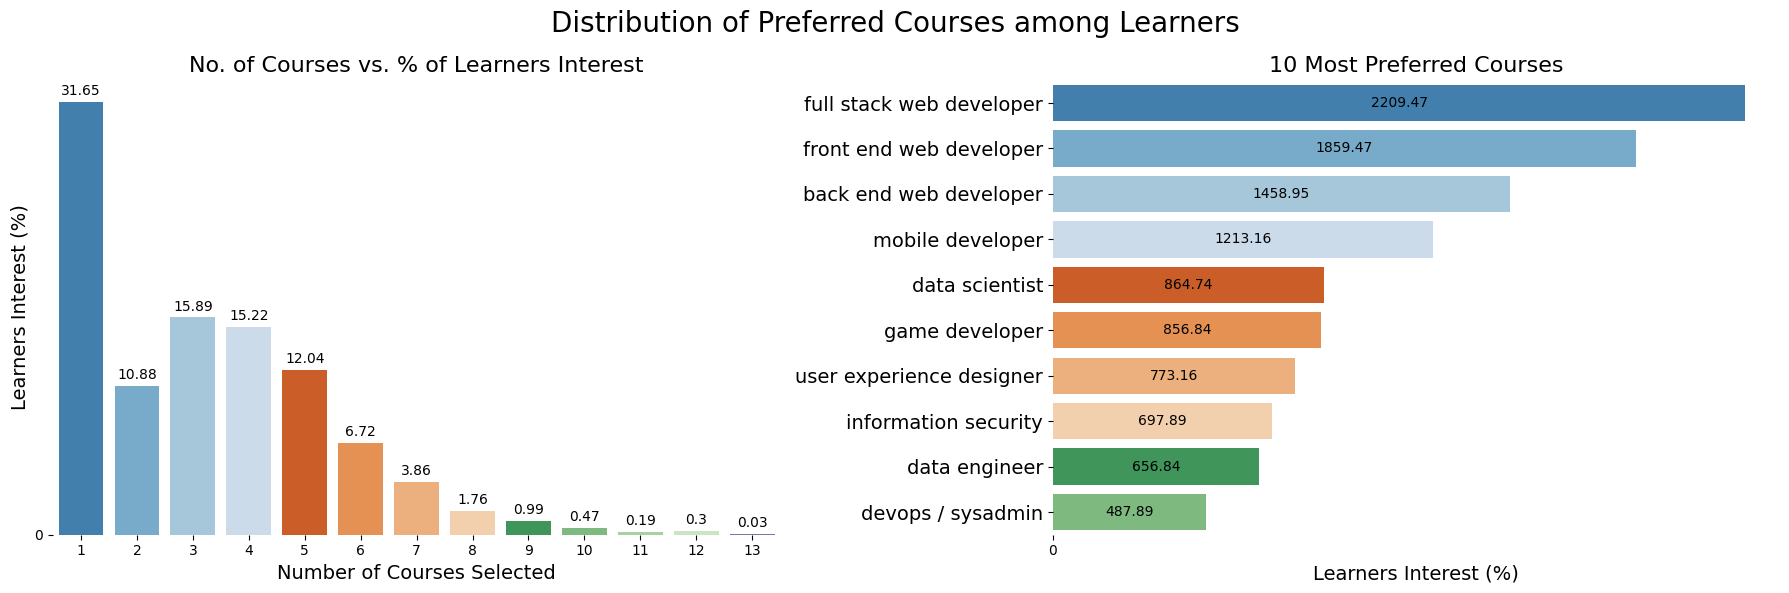

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot number of courses
sns.barplot(x=roles_count.index.astype(int), y=roles_count, ax=ax1, palette='tab20c')

# Plot most preferred courses
sns.barplot(x=top_roles['Count%'], y=top_roles['RoleName'], ax=ax2, palette='tab20c')

for ax in [ax1, ax2]:
    ax.set_ylabel('')
    if ax == ax1:
        ax.set_title('No. of Courses vs. % of Learners Interest', size=16)
        ax.set_ylabel('Learners Interest (%)', size=14)
        ax.set_yticks([False])
        ax.set_xlabel('Number of Courses Selected', size=14)
    else:
        ax.set_title('10 Most Preferred Courses', size=16)
        ax.set_xlabel('Learners Interest (%)', size=14)
        ax.set_xticks([False])
        ax.tick_params(axis='y', labelsize=14)

sns.despine(top=True, right=True, left=True, bottom=True)

# Add bar values
for indx, row in roles_count.items():
    ax1.text(indx - 1, row + 0.5, row, color='black', ha="center", size=10)
    
for p in ax2.patches:
    w, h = p.get_width(), p.get_height()
    ax2.text(w * .5, p.get_y() + 0.5 * h, w, ha='center', va='center', size=10)    

# Set common title for both plots
plt.suptitle('Distribution of Preferred Courses among Learners', size=20)

plt.tight_layout()
plt.show()

Based on the above distributions, the following observations can be summarized:

- The top three most sought out courses are full stack web development (22.09%), front end web development (18.59%), and back end web development (14.58%).
- Other popular courses among learners include mobile development (12.13%), data science (8.65%), game development (8.57%), and user experience design (7.73%).
- Information security (6.98%), data engineering (6.57%), and devops/sysadmin (4.88%) are relatively less popular.
- Web development courses are in high demand, which suggests that learners are interested in pursuing careers in web development.
- There is significant interest in fields such as data science, game development, and user experience design, which are important areas of specialization in the tech industry.

### Learners Interested in Web Development or Mobile Development Roles

The distribution of the number of courses taken by learners indicates that they are interested in more than one subject. The top 10 most preferred courses also provide insights into the various courses that learners are interested in.

Moreover, it is evident that front-end web development and full-stack web development can be considered specializations under the broader term "Web Developer". Currently, the data has not undergone a thorough cleaning process, and responses have been categorized into two groups:

- Web or Mobile: coders who have mentioned at least one of the two roles
- Others: coders who have not mentioned either role

To analyze job role data, we will define a function called `search_web_mob` that searches for the terms "web dev" or "mobile dev" in a list of job roles. If either of these terms is found, the function will classify the job as "web or mobile". Otherwise, it will return "others".

After defining the function, we will use it to create a new column called `WebOrMobDev`. This column will indicate whether each respondent expressed interest in web or mobile development.

In [17]:
def search_web_mob(job_list):
    pattern = re.compile(r'web\s?developer|mobile\s?developer')
    if job_list is not np.nan:
        web_mob_list = list(filter(pattern.search, job_list))
        if len(web_mob_list) > 0:
            return 'web or mobile'
        else:
            return 'others'
    
rel_fcc_survey['WebOrMobDev'] = rel_fcc_survey.JobRoleInterest.apply(search_web_mob)

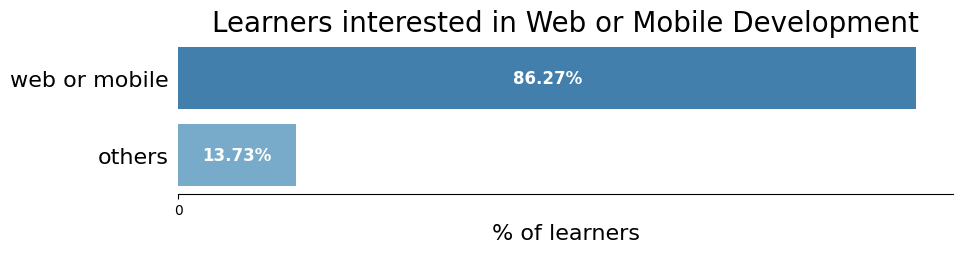

In [20]:
# Calculate the frequency to learners interest in percentage
jobs_percent = rel_fcc_survey.WebOrMobDev.value_counts(normalize=True)
# Extract frequency indexes (['web or mobile', 'others'])
jobs_freq_indexes = rel_fcc_survey.WebOrMobDev.value_counts().index

fig, ax = plt.subplots(figsize=(10, 2))

# Create horizontal bar plot
ax = sns.barplot(x=jobs_percent, y=jobs_freq_indexes, palette='tab20c')

# Set title and axis labels
ax.set_title('Learners interested in Web or Mobile Development', size=20)
ax.set_xlabel('% of learners', size=16)
ax.set_xticks([False])
ax.tick_params(axis='y', labelsize=16, left=False)

# Disable spines
for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)

# Add bar values in the center of each bar in white color
for i, v in enumerate(jobs_percent):
    ax.text(v/2, i, str(round(v*100, 2))+'%', color='white', va='center', ha='center', fontweight='bold', size=12)
    
plt.show()

Based on the results obtained, it can be observed that the majority of the respondents in the dataset are interested in web and/or mobile development skills. Specifically, 86.27% of the respondents have mentioned at least one of the two roles, while 13.73% have mentioned others.

In terms of the representativeness of the dataset, we can conclude that it is valid for further analysis. The fact that the dataset includes a significant number of respondents interested in web and/or mobile development skills suggests that it is representative of the population of respondents that the we are looking for. This makes the dataset useful for conducting further analysis and drawing meaningful insights.

## New Coders - Locations and Densities

